In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
!pip install mlxtend
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Problem Statement  
Prepare rules for the all the data sets  1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  2) Change the minimum length in apriori algorithm  3) Visulize the obtained rules using different plots 

In [2]:
df = pd.read_csv(r"C:\Users\Shivani Kharade\Desktop\DS ExcelR\Assignments\Association Rules\book.csv")

In [3]:
df.head(20)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
df1 = df.copy()

In [5]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
df.shape

(2000, 11)

In [9]:
item_sets = {}

In [10]:
te = TransactionEncoder()

In [11]:
te_ary = te.fit(df1).transform(df1)

In [12]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

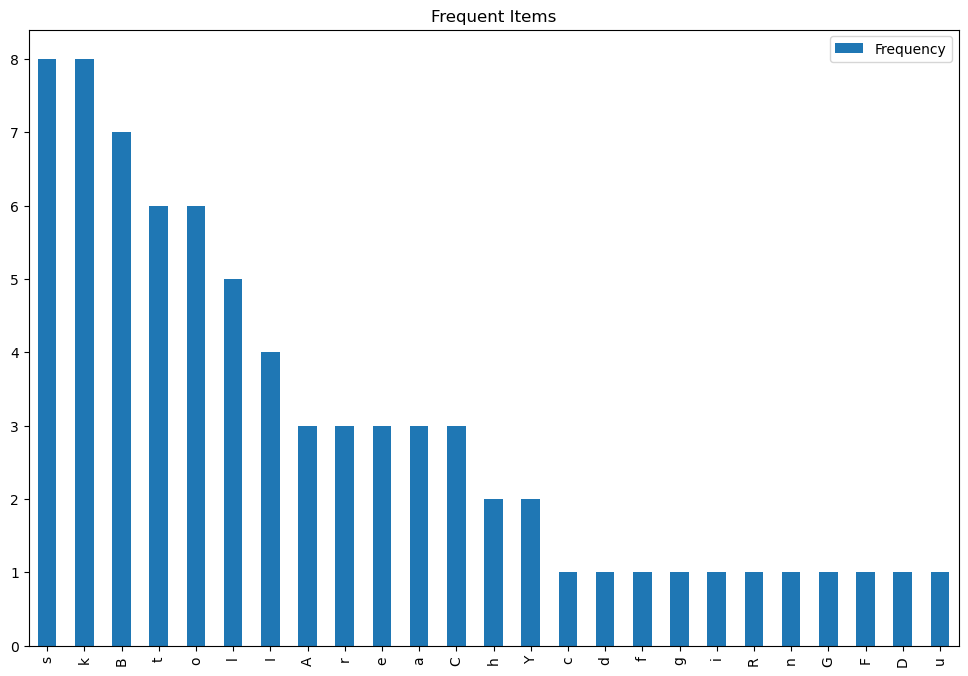

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

##  Apriori Algorithm

In [14]:
ap0_5 = {}
ap1 = {}
ap5 = {}
ap1_0 = {}

In [15]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [17]:
conf = []

In [18]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    conf.append(ap_i)

In [19]:
all_conf = pd.concat(conf,axis=1)

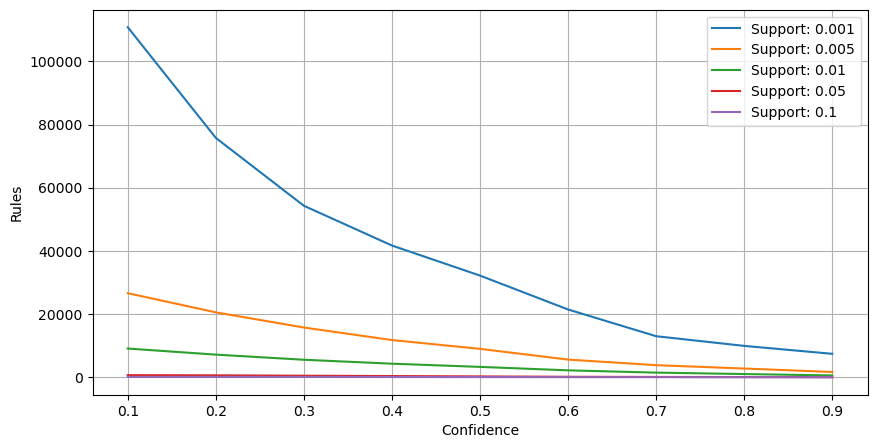

In [20]:
all_conf.plot(figsize=(10,5),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [21]:
#Lower the Confidence level Higher is the no. of rules.
#Higher the Support, lower is the no. of rules.

In [22]:
ap_final =  apriori(ap,0.001,True)

In [23]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [24]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940,0.998498
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925,0.997747
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
...,...,...,...,...,...,...,...,...,...,...
742,"(Y, B)","(k, o, s, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf,1.000000
743,"(o, Y)","(k, s, B, t)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf,0.999499
744,"(B, t)","(k, o, s, Y)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970,1.000000
745,"(o, t)","(k, s, Y, B)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970,1.000000


In [25]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

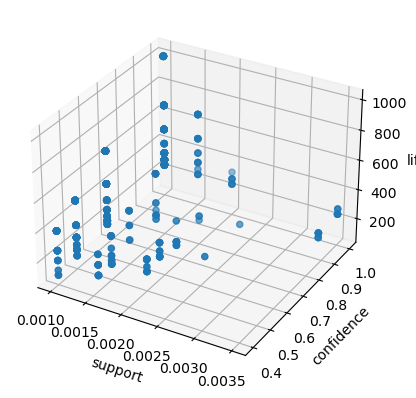

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

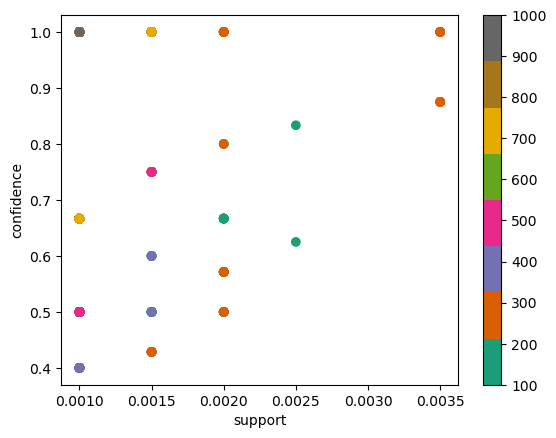

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'Dark2')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")